# MNIST - A Exploration in to Data Analysis

## 1 - Introduction

This is monologue of my progress through this project.

MNIST is the Hello World of neural networks. My aim is to learn as much as possible about neural networks and other data analysis methods by analysing this dataset as well as learning how to best use the features of the high level programming language Python.

My approach to this problem will be through the following steps:
1. Understand the raw data
2. Consider different potential solutions to the problem
3. Pick a model
4. Process the raw data so it is in a suitable form for the algorithms to work
5. Fit/train a model
6. Analyse the model and try to find improvements

### 1.1 - Understanding the Raw Data

The data are in csv files. Each file has 785 columns. For the training data, the first column is the label, that is the digit drawn by the user. The remaining 784 columns make up the images. The images are 28x28 pixels in size and each row represents one whole image. Consequently each image is of relatively low quality and is in greyscale. The testing data is identical but with the label column omitted, hence there are only 784 columns in this file.

The images can be reconstructed by taking the first 28 cells as the first row of pixels of the image. The subsequent 28 cells make up the second row of pixels of the image etc.

The submission file must have the following format:
```
ImageId,Label
1,0
2,0
3,0
etc.
```

### 1.2 - Potential Solutions

One popular solution is to use a neural network to classify the digits. This is something I will explore using Tensorflow. If this is successful I may then look to improve this training process with regards to speed and efficiency by training the model in C/C++ on my GPU.

This problem would also lend itself well to using some sort of clustering algorithm. Further research and implentation in to k-means clustering algorithms and the algorithms I have learned at university will be considered.

A classification regression tree may also work here.

Finally I am aware of support-vector machines. I am not entirely sure what these are hence more research is required, but that is another method that should be explored.

## 2 - Neural Network Model

### 2.0 - Introduction

The neural network model requires an initial layer with one node per pixel. In this case, that is 28^2 input nodes. The output layer requires as many nodes as there are classes. This final layer usually uses a softmax activation function on each of the nodes. This converts each of the nodes to a value between 0 and 1 such that the sum of all the values sums to 1. This means the output can be interpreted as a probability of the image beloging to each particular class.

The difficult part of neural networks is filling in the hidden layers. A single layer NN is only capable of handling linearly separable classes. Adding extra layers allows for more complex class structure. And nodes without an activation function are only capable of linear regression. Hence different activation functions are used they all behave different during training. Hidden layers will often use the rectified linear unit (ReLU) activation function on each node. This is a very natural interpretation of a neuron. Deeper networks and other special layers, such as convolutional layers, are another method to allow for a model to detect different features. 

The aim here is to learn how these layers can be combined to create a good model and this shall be done through hands on experimentation and through research.

### 2.1 - Preprocess the Data

In [2]:
# For the matplotlib to run well in jupyter notebook
%matplotlib inline

import numpy as np # For linear algebra
import pandas as pd # For data structures and easy file handling
import matplotlib.pyplot as plt # For plotting graphs easily
import tensorflow as tf # For neural networks using Keras

I shall now read the train and test data files.

In [3]:
raw_data_train = pd.read_csv('data/train.csv')
raw_data_test = pd.read_csv('data/test.csv')

print(type(raw_data_test))

print(raw_data_train.head())

print('Training dimensions', raw_data_train.shape)
print('Testing dimensions', raw_data_test.shape)

<class 'pandas.core.frame.DataFrame'>
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pix

Evidently the train dataset has 42000 rows and the test dataset has 28000 rows. So there is plenty of data to be working with!

First, I need to preprocess the data so it is in a usuable form. The block below coverts the raw data stored as pd.DataFrames and converts it to np.arrays. This can be thought of as reconstructing the original image. This will be flattened after any convolutional layers (if present) in the neural network model anyway (sending it back to a 1D vector).

In [4]:
img_rows, img_cols = 28, 28
num_classes = 10

def prep_raw_data(raw_data):
    """Splits the training data in to training and validation datasets.
    """
    y = raw_data.label.values
    out_y = tf.keras.utils.to_categorical(y=y, num_classes=num_classes)
    x = raw_data.values[:, 1:]
    return out_y, reshape_data(x)

def reshape_data(array):
    """Returns n x 28 x 28 numpy array that has been standardised.
    """
    if isinstance(array, pd.DataFrame):
        #assume array is the testing data and convert it to a numpy array
        array = array.values[:,:]
        
    return array.reshape(array.shape[0], 28, 28)/255

y_train, x_train = prep_raw_data(raw_data_train)
x_test = reshape_data(raw_data_test)

Just to show that the preprocessing has worked, here is a plot of a data point.

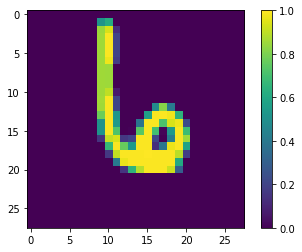

In [5]:
plt.figure()
plt.imshow(x_train[123])
plt.colorbar()
plt.grid(False)
plt.show()

### 2.2 - First Model

Here I shall bulid a model starting with a very basic architecture and try to improve the model iteratively by adding different layer types and combinations.

First I will start with a hidden layer with 100 nodes and ReLU as the activation function. To compile to model I will just use stochastic gradient descent (SGD) at first and I shall explore other algorithms some other time. [Click here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) to view the optimiser algorithms built in to TF. These will be explored in depth later. I shall set the loss function to categorical crossentropy. The meaning of this and alternative loss functions are explored in a later section, for now just take this as given. The metric is added to simply show the accuracy during training, it is not required. Other metrics are also explored in a later section.

In [6]:
basic_model_1 = tf.keras.models.Sequential()
basic_model_1.add(tf.keras.layers.Flatten())
basic_model_1.add(tf.keras.layers.Dense(100, activation = 'relu'))
basic_model_1.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))

basic_model_1.compile(optimizer = 'SGD', 
                    loss = tf.keras.losses.categorical_crossentropy,
                    metrics = ['accuracy'])

basic_model_1.fit(x = x_train, y = y_train)

predictions_1 = np.argmax(basic_model_1.predict(x = x_test), axis = 1)

Train on 42000 samples
42000/42000 [==============================] - 4s 89us/sample - loss: 0.7325 - accuracy: 0.8154


In [7]:
output = pd.DataFrame({'ImageId': range(1,28001), 'Label': predictions_1})
output.to_csv('Submissions.csv', index = False)

According to kaggle, this model achieved a 88.5% accuracy! Not bad. However this puts me 2906th of 3180 submissions... that's the 92nd percentile (at the time of writing, June 2020). 

The next step is to explore methods that will improve the accuracy of results. I should also change the way I check my accuracy of my models as uploading to Kaggle every time is slow.

To do this I will split the training data in to a training and validation set. I can hard code this by physically splitting the data or I can use `validation_split = 0.2` to let TF decide which data points should be set aside for validation during the fit. See below: 

In [8]:
basic_model_2 = tf.keras.models.Sequential()
basic_model_2.add(tf.keras.layers.Flatten())
basic_model_2.add(tf.keras.layers.Dense(100, activation = 'relu'))
basic_model_2.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))

basic_model_2.compile(optimizer = 'SGD', 
                    loss = tf.keras.losses.categorical_crossentropy,
                    metrics = ['accuracy'])

basic_model_2.fit(x = x_train, 
                y = y_train,
                validation_split = 0.2)

Train on 33600 samples, validate on 8400 samples
33600/33600 [==============================] - 3s 91us/sample - loss: 0.8311 - accuracy: 0.7956 - val_loss: 0.4500 - val_accuracy: 0.8835


The validation accuracy can now be seen from the output above. This value changes everytime the code is run as different parts of the data are reserved each time for the validation.

Now would be a good time to infer each of the output terms above. 
- `loss:` refers to the loss function defined during compiling. This is a cumulative reading that updates as the model trains. It is not recalculated constantly, just updated with each new piece of information. As such it should not be interpeted as an estimate of the loss of the model but can used to see how the loss function is changing as the model trains. Lower is better and shall explored further in a subsequent section.
- `accuracy:` is the proportion of correct classifications by the model. Again, this is a cumulative reading and is not updated each time the model is trained. Hence it is simply used to see how the model accuracy is changing as the model trains.
- `val_loss:` is the loss function as above but calculated on the validation set the TF sets aside. This is a good representation of the suitability of the trained model.
- `val_accuracy:` refers to the proportion of correct classifications in the validation training set. This is a good estimate of the final model accuracy.

### 2.3 - Important Features of Neural Networks

Topics that are explored in this section include:
- Activation functions
- Optimisation Methods
- Learning rate
- Momentum???
- Loss Functions
- Epochs
- Batch sizes
- Node count per layer
- Number of layers
- Dropout
- Different types of layers
- Convolutional Layers
- Stride length
- Data Augmentation (not really applicable here)

#### 2.3.1 - Activation Functions

There are many different activation functions. The most popular are explained below including when each one should be used.

##### 2.3.1.1 - Heaviside Step Function

Also known as the Binary Step Function, this is define as follows:

$$H(x) := \frac{d}{dx}\max\{x,0\}$$


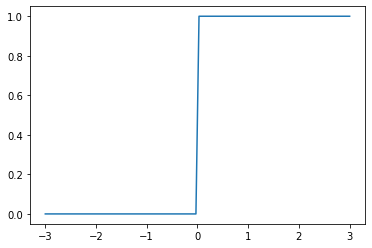

In [9]:
plt.figure()
plt.plot(np.linspace(-3,3, 100), np.heaviside(np.linspace(-3,3, 100), 0.5))
plt.show()

The step need not occur at 0, it could be somewhere else. However this function isn't useful if there are more than two classes. Also, $\frac{dH}{dx}=0$ everywhere so there is no back propogation required to update any prior weights.

##### 2.3.1.2 - Linear Function

$y=ax$ for some $a$. This is better as the gradient is non-zero however the gradient is constant meaning the weights all change at the same rate. This is not good.

##### 2.3.1.3 - Sigmoid Function

$$f(x)=\frac{1}{1+e^{-x}}$$

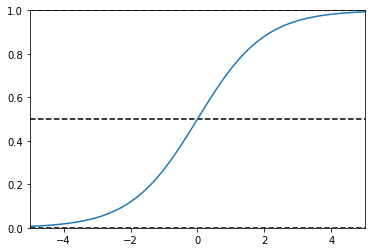

In [19]:
plt.figure()
plt.plot(np.linspace(-5, 5, 100), 1/(1+np.exp(-1*np.linspace(-5, 5, 100))))
plt.hlines([0,0.5,1], -5, 5, linestyles='dashed')
plt.margins(0)
plt.show()

This is one of the most widely used non-linear activation functions. Importantly, the function is continuously differentiable such that $f'(x)=1-f(x)$. However the gradient is only really significant for values in $(-3,3)$. Outside of this interval the network isn't really learning. Furthermore the sigmoid function has range $(0,1)$ so the output is always positive. This is a little restrictive and is addressed with the hyperbolic tangent function.

##### 2.3.1.4 - Hyperbolic Tangent Function (Tanh)

$$
\begin{align}
\tanh(x) & =2\text{sigmoid}(2x)-1 \\
           & =\frac{2}{(1+e^{-2x})-1}
\end{align}           
$$

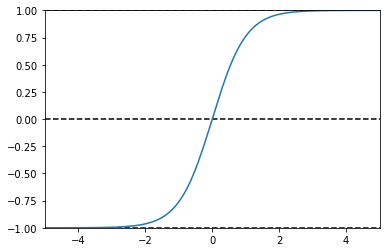

In [21]:
plt.figure()
plt.plot(np.linspace(-5, 5, 150), np.tanh(np.linspace(-5, 5, 150)))
plt.hlines([-1,0,1], -5, 5, linestyles='dashed')
plt.margins(0)
plt.show()